## The objective of this analysis file is to import, clean, understand and visualize simply the data.

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import cufflinks as cf
cf.go_offline()


### Import and check the data

#### First, we import the column row.

In [3]:
column = pd.read_csv('../Data/tao-all2.col', names = 'c')
column

,c
0,obs
1,year
2,month
3,day
4,date
5,latitude
6,longitude
7,zon.winds
8,mer.winds
9,humidity


#### Then, we import the full dataset adding the previously imported column row

In [4]:
data = pd.read_csv('../Data/tao-all2.dat', sep=' ', names = column['c'])
data.head()

,obs,year,month,day,date,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
obs          178080 non-null int64
year         178080 non-null int64
month        178080 non-null int64
day          178080 non-null int64
date         178080 non-null int64
latitude     178080 non-null float64
longitude    178080 non-null float64
zon.winds    178080 non-null object
mer.winds    178080 non-null object
humidity     178080 non-null object
air temp.    178080 non-null object
s.s.temp.    178080 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 16.3+ MB


### Cleaning the data

#### We see that some values are a period. In order to see all of them and to manipulate them as numbers, we transform all periods into nan values

In [6]:
data = data.replace('.', np.nan)
data.isna().sum()

obs              0
year             0
month            0
day              0
date             0
latitude         0
longitude        0
zon.winds    25163
mer.winds    25162
humidity     65761
air temp.    18237
s.s.temp.    17007
dtype: int64

#### Next, we change the format of some columns from object to float.

In [7]:
data = data.astype({'zon.winds' : float})
data = data.astype({'mer.winds' : float})
data = data.astype({'humidity' : float})
data = data.astype({'air temp.' : float})
data = data.astype({'s.s.temp.' : float})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
obs          178080 non-null int64
year         178080 non-null int64
month        178080 non-null int64
day          178080 non-null int64
date         178080 non-null int64
latitude     178080 non-null float64
longitude    178080 non-null float64
zon.winds    152917 non-null float64
mer.winds    152918 non-null float64
humidity     112319 non-null float64
air temp.    159843 non-null float64
s.s.temp.    161073 non-null float64
dtypes: float64(7), int64(5)
memory usage: 16.3 MB


#### We change now the year column values to standard year values. Plus, we change the date column information with to_datetime function.

In [8]:
data['year']= data['year'].apply(lambda x: x+1900)
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
obs          178080 non-null int64
year         178080 non-null int64
month        178080 non-null int64
day          178080 non-null int64
date         178080 non-null datetime64[ns]
latitude     178080 non-null float64
longitude    178080 non-null float64
zon.winds    152917 non-null float64
mer.winds    152918 non-null float64
humidity     112319 non-null float64
air temp.    159843 non-null float64
s.s.temp.    161073 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 16.3 MB


In [9]:
data.head()

,obs,year,month,day,date,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1,1980,3,7,1980-03-07,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24
1,2,1980,3,8,1980-03-08,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97
2,3,1980,3,9,1980-03-09,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28
3,4,1980,3,10,1980-03-10,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31
4,5,1980,3,11,1980-03-11,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19


### Description of the data.

#### We take a look at the 5 columns that provide information about meteorological conditions.

In [64]:
data.describe()[['zon.winds', 'mer.winds', 'humidity', 'air temp.', 's.s.temp.']]

,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
count,152917.000000,152918.000000,112319.000000,159843.000000,161073.000000
mean,-3.304772,0.249762,81.236525,26.887567,27.715309
std,3.373492,2.999202,5.313061,1.816429,2.057428
min,-12.400000,-11.600000,45.400000,17.050000,17.350000
25%,-5.800000,-1.700000,77.700000,26.060000,26.770000
50%,-4.000000,0.300000,81.200000,27.340000,28.290000
75%,-1.400000,2.300000,84.800000,28.180000,29.230000
max,14.300000,13.000000,99.900000,31.660000,31.260000


#### As a first glimpse of the data, we visualize the air and sea temperature -daily mean of all buoys- against time.

In [16]:
data_temp = data.groupby(by='date').mean()[['air temp.', 's.s.temp.']]

data_temp.iplot(kind='line', xTitle='Time',
           yTitle='Air/Sea Temperature (ºC)', title='Air and set temperature between 1980 and  1998')

#### We visualize the humidity -daily mean of all buoys- column against time.

In [17]:
data_hum = data.groupby(by='date').mean()[['humidity']]

data_hum.iplot(kind='line', xTitle='Time',
           yTitle='Humidity (%)', title='Humidity between 1980 and  1998')

#### We visualize the N-S (zon) and E-W (mer) winds -daily mean of all buoys- column against time.

In [19]:
data_zon_win = data.groupby(by='date').mean()[['zon.winds', 'mer.winds']]

data_zon_win.iplot(kind='line', xTitle='Time',
           yTitle='N-S (zon) and E-W (mer) winds (m/s)', title='Winds between 1980 and  1998')

#### We look at the correlation between the different variables.

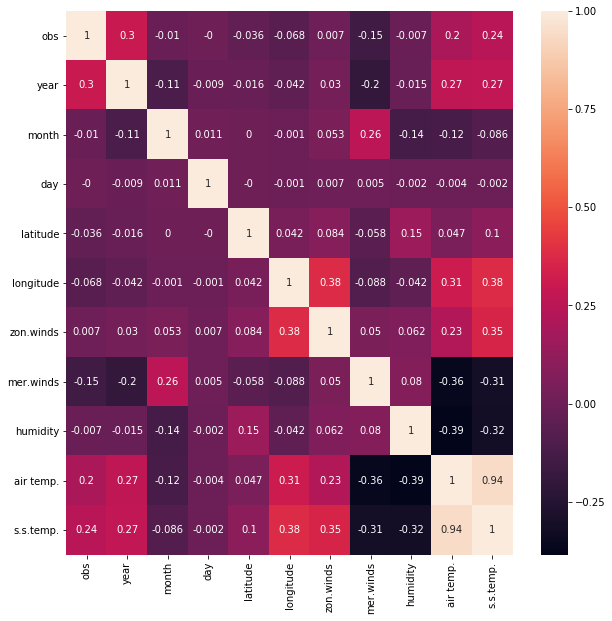

In [20]:
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(round(data.corr(), 3), annot=True)

### Export to a csv

#### We finally save the data in a new csv.

In [29]:
data.to_csv('../Data/enso_data_cleaned.csv', index= False)

In [28]:
data.head()

,obs,year,month,day,date,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1,1980,3,7,1980-03-07,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24
1,2,1980,3,8,1980-03-08,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97
2,3,1980,3,9,1980-03-09,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28
3,4,1980,3,10,1980-03-10,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31
4,5,1980,3,11,1980-03-11,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
obs          178080 non-null int64
year         178080 non-null int64
month        178080 non-null int64
day          178080 non-null int64
date         178080 non-null datetime64[ns]
latitude     178080 non-null float64
longitude    178080 non-null float64
zon.winds    152917 non-null float64
mer.winds    152918 non-null float64
humidity     112319 non-null float64
air temp.    159843 non-null float64
s.s.temp.    161073 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 16.3 MB


# TRY TO CHECK IT SOME TIME

In [74]:
data_missing = pd.read_csv('../Data/tao-all2.missing', sep= '        ')

/home/atwenter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [75]:
data_missing.head()

,0,0.1,0,0,0 1,0.1,0.2
0,0,0,0,0,0 1,0,0
1,0,0,0,0,0 1,0,0
2,0,0,0,0,0 1,0,0
3,0,0,0,0,0 1,0,0
4,0,0,0,0,0 1,0,0


In [76]:
data_missing_2 = pd.read_csv('../Data/tao-all2_missing.csv')

In [77]:
data_missing_2.head()

,0 0 0 0 0 1 0 0
0,0 0 0 0 0 1 0 0
1,0 0 0 0 0 1 0 0
2,0 0 0 0 0 1 0 0
3,0 0 0 0 0 1 0 0
4,0 0 0 0 0 1 0 0
